In [0]:
import numpy as np
from sklearn.datasets import load_boston

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
bostons=load_boston()
print(bostons.DESCR)

In [3]:
type(bostons)

sklearn.utils.Bunch

In [4]:
bostons.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(bostons.data) #bostons의 data

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
len(bostons.data)

506

In [7]:
len(bostons.target), len(bostons.feature_names), len(bostons.target)

(506, 13, 506)

In [8]:
bostons.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
bostons.data.shape

(506, 13)

In [0]:
bostons.target, len(bostons.target)

In [0]:
#대표값 구할 항목: CHAS는 범주형자료이므로 빼야할 듯.

In [0]:
i=0
for i in range(len(bostons.feature_names)):
  print(bostons.feature_names[i])
  print("평균:",np.mean(bostons.data,axis=0)[i])
  print("중간값:",np.median(bostons.data,axis=0)[i])
  print("표준편차:",np.std(bostons.data, axis=0)[i])
  print("최대값:", np.max(bostons.data, axis=0)[i])
  print("최소값:", np.min(bostons.data, axis=0)[i])
  print('\n')
  i=i+1

In [0]:
def representative(dataset):
  dataset_t=dataset.T
  i=0
  for i in range(len(dataset_t)):
    mean=np.mean(dataset_t,axis=1)[i]
    median=np.median(dataset_t,axis=1)[i]
    std=np.std(dataset_t,axis=1)[i]
    max_=np.max(dataset_t, axis=1)[i]
    min_=np.min(dataset_t, axis=1)[i]

    matrix=np.matrix([[mean],[median],[std],[max_],[min_]])

    print(bostons.feature_names[i])
    print(matrix)
    print('\n')

CRIM(범죄율)을 예를 들어보면 평균은 62.37687077, 중간값은 4.98로 차이가 매우 크고 표준편차도 123.86865333으로 각 데이터 개체 간 편차가 크다. 또한 mean>med로 좌로 치우친 분포임을 예상할 수 있다. (범죄율이 낮은 곳이 대다수고 범죄율이 극단적으로 높은 몇 개가 있는 듯)
이런 경우는 평균보다 중간값을 사용하는 것이 데이터의 경향을 확인하기에 더 적합하다. 

In [0]:
representative(bostons.data)

In [0]:
#scatter and plot => scatter: CRIM, PTRATIO and grouped by TAX
#선정이유:학생/교사 ratio가 높을 수록 열악한 교육환경이라고 보고, 이것이 범죄율과 양의 상관관계를 보이는지 알아보기 위해.
#         또한 범죄율과 열악한 교육환경의 관계성 정도가 부의 수준에 따라 달라지는 지 보기 위해 TAX 그룹별로 그림

In [0]:
print(bostons.data[:,9])

bostons.data[:,9] 값들의 분포 및 적절한 슬라이싱 지점을 찾기 위한 방법이 있나?

200 이하
200이상 400이하 
400이상 

In [0]:
tax_mask_0=(bostons.data[:,9]<200)
tax_mask_1=(bostons.data[:,9]>=200)&(bostons.data[:,9]<400)
tax_mask_2=(bostons.data[:,9]>=400)

In [0]:
crim=bostons.data[:,0]
ptratio=bostons.data[:,10]

In [0]:
crim_masked_0=crim[tax_mask_0]
crim_masked_1=crim[tax_mask_1]
crim_masked_2=crim[tax_mask_2]
ptratio_masked_0=ptratio[tax_mask_0]
ptratio_masked_1=ptratio[tax_mask_1]
ptratio_masked_2=ptratio[tax_mask_2]

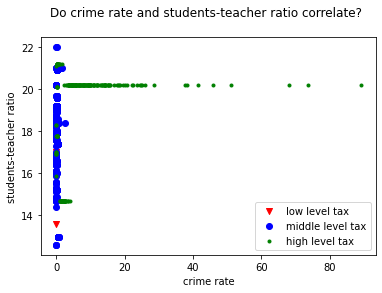

In [43]:
plt.scatter(crim_masked_0, ptratio_masked_0, marker='v', color='r')
plt.scatter(crim_masked_1, ptratio_masked_1, marker='o', color='b')
plt.scatter(crim_masked_2, ptratio_masked_2, marker='.', color='g')
plt.xlabel("crime rate")
plt.ylabel("students-teacher ratio")
plt.legend(['low level tax','middle level tax','high level tax' ])
plt.title("Do crime rate and students-teacher ratio correlate? \n") 
plt.show()

In [0]:
#재산세를 많이 내는 집단(high level tax)은 전반적으로학생/교사 비율이 타 집단에 비해 높은 구간에 많이 분포해있다.
#특이한 점은 재산세를 많이 내는 집단(high level tax) 중 1인당 범죄발생율이 높은 개체(town)가 많다는 점이다. 
#가설을 세울 때 상관관계 또는 인과관계가 있을 것이라 예상했던 범죄율과 학생/교사 비율은 크게 상관이 없는 것으로 나타났다. 